## import the libraries 

In [1]:

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Load data

In [2]:
bread = pd.read_csv("BreadBasket_DMS.csv")
bread


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## one hot encoding

In [3]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


## Data cleaning

In [4]:
bread.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [5]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("There are {0} missing values in the dataframe.".format(len(bread[bread.Item.isin(missing_value)])))
bread[bread.Item.isin(missing_value)].head(10)


There are 786 missing values in the dataframe.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


## Convert to DatetimeIndex

In [6]:
bread["month"] = pd.DatetimeIndex(bread["Date"]).month

In [7]:
bread = bread.drop(bread[bread.Item == "NONE"].index)
print("Number of rows: {0}".format(len(bread)))
bread.head(10)

Number of rows: 20507


,Date,Time,Transaction,Item,month
0,2016-10-30,09:58:11,1,Bread,10
1,2016-10-30,10:05:34,2,Scandinavian,10
2,2016-10-30,10:05:34,2,Scandinavian,10
3,2016-10-30,10:07:57,3,Hot chocolate,10
4,2016-10-30,10:07:57,3,Jam,10
5,2016-10-30,10:07:57,3,Cookies,10
6,2016-10-30,10:08:41,4,Muffin,10
7,2016-10-30,10:13:03,5,Coffee,10
8,2016-10-30,10:13:03,5,Pastry,10
9,2016-10-30,10:13:03,5,Bread,10


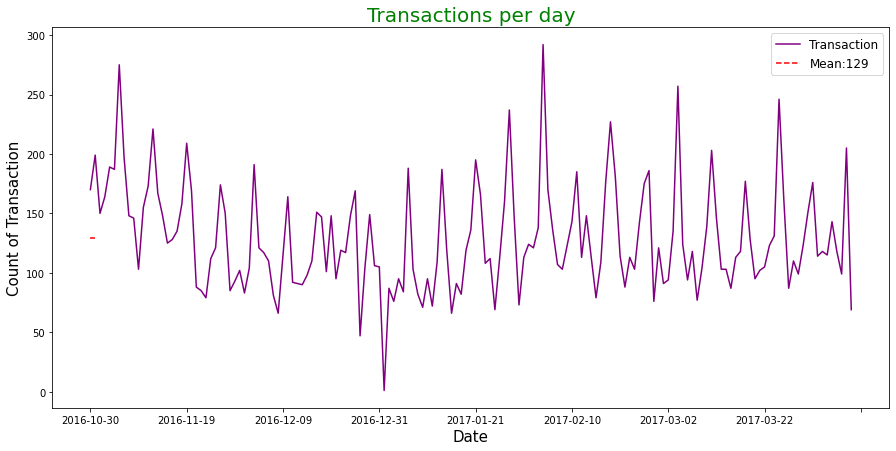

In [8]:
bread.groupby('Date')['Transaction'].count().plot(kind="line",figsize=(15,7),color='purple')
plt.xlabel('Date', size = 15)
plt.ylabel('Count of Transaction', size = 15)
plt.hlines(y = 129, color='red', xmin=bread['Date'].min(), xmax=bread['Date'].max(),
           linestyles='dashed', label='Mean:129')
plt.title('Transactions per day',  color = 'green', size = 20)
plt.legend(fontsize='large')
plt.show()

In [12]:
bread["month"] = pd.DatetimeIndex(bread["Date"]).month

In [13]:
bread['Datetime'] = pd.to_datetime(bread['Date']+' '+bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head(10)

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam
2016-10-30 10:07:57,3,Cookies
2016-10-30 10:08:41,4,Muffin
2016-10-30 10:13:03,5,Coffee
2016-10-30 10:13:03,5,Pastry


## Quick Stats

In [14]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = total_items / total_days
unique_items = bread.Item.unique().size

print("There are {} unique items sold by the Bakery".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))


There are 94 unique items sold by the Bakery
Total 20507 items sold in 159 days throughout 7 months
With an average of 128.9748427672956 items sold daily


# Data visualization

# rank the top 10 best-selling items

In [12]:


bread.Item.value_counts(normalize=True)[:10]

Coffee           0.266787
Bread            0.162140
Tea              0.069976
Cake             0.049983
Pastry           0.041742
Sandwich         0.037597
Medialuna        0.030039
Hot chocolate    0.028771
Cookies          0.026332
Brownie          0.018481
Name: Item, dtype: float64

## creating a bar chart, rank by percentage

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Percentage')]

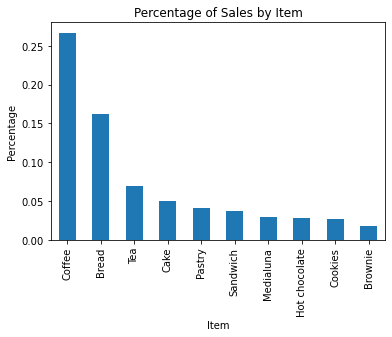

In [13]:

bread.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

## create a bar chart, rank by value

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Total Number')]

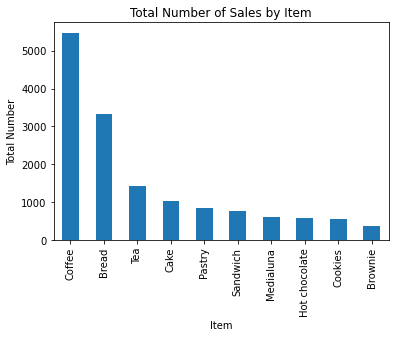

In [14]:

bread.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

## TOP 10 POPULAR SUMMER ITEMS

<AxesSubplot:title={'center':'Popular Summer Items'}>

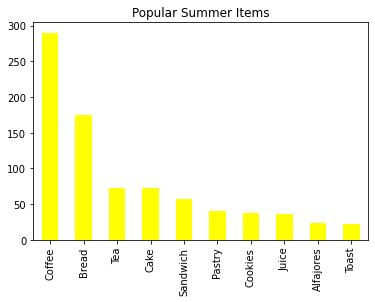

In [9]:
win = [1, 2, 3, 10, 11, 12] #A list of "winter" months
bread["sumWin"] = bread["month"].apply(
    lambda x: "Winter" if x in win else "Summer") #Add a column to the dataframe to distinuish summer and winter

bread["Item"].loc[bread["sumWin"] == "Summer"].value_counts()[:10].plot.bar(
    title = "Popular Summer Items", color = "yellow") #Plot the counts of the most popular summer items

## TOP 10 POPULAR WINTER ITEMS

<AxesSubplot:title={'center':'Popular Winter Items'}>

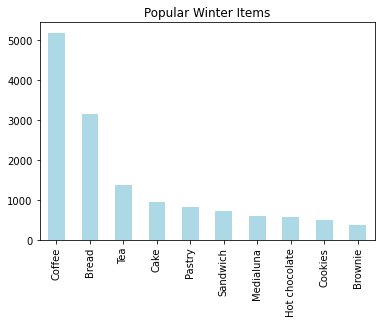

In [10]:
bread["Item"].loc[bread["sumWin"] == "Winter"].value_counts()[:10].plot.bar(
    title = "Popular Winter Items", color = "lightblue") #Plot the counts of the most popular winter items

# plot time series chart of number of items by day

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

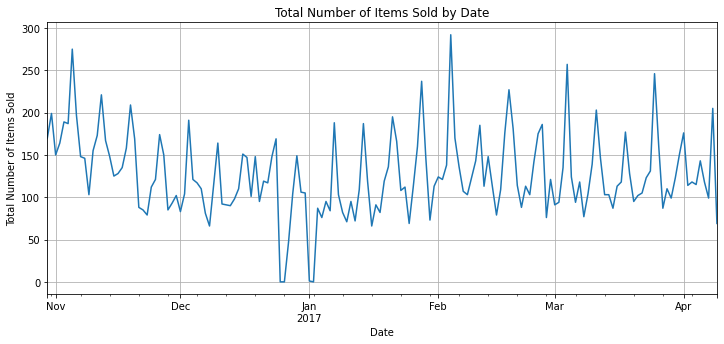

In [15]:

bread["Item"].resample("D").count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [16]:
bread["Item"].resample("M").count()

Datetime
2016-10-31     369
2016-11-30    4436
2016-12-31    3339
2017-01-31    3356
2017-02-28    3906
2017-03-31    3944
2017-04-30    1157
Freq: M, Name: Item, dtype: int64

# plot time series chart of number of items by month

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

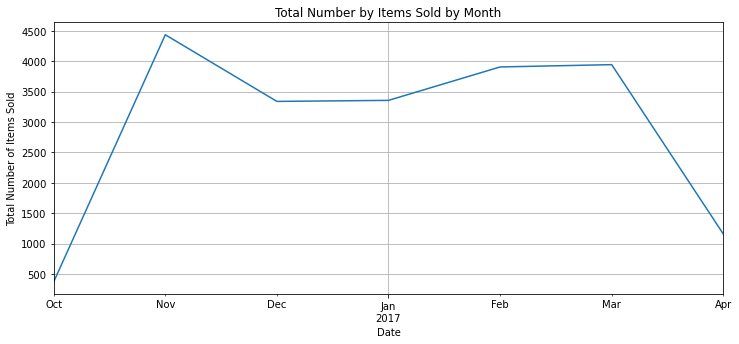

In [17]:

bread["Item"].resample("M").count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")


# extract hour of the day and weekday of the week

In [18]:

# For Datetimeindex, the day of the week with Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday + 1

bread.head(10)

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
2016-10-30 10:07:57,3,Cookies,10,7
2016-10-30 10:08:41,4,Muffin,10,7
2016-10-30 10:13:03,5,Coffee,10,7
2016-10-30 10:13:03,5,Pastry,10,7


In [19]:
bread_groupby_hour = bread.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
bread_groupby_hour

,Item
Hour,
1,0.006289
7,0.150943
8,4.056604
9,12.364780
10,16.767296
11,19.509434
12,17.949686
13,16.459119
14,16.603774


[Text(0.5, 0, 'Hour of the Day (24 hour time)'),
 Text(0, 0.5, 'Average Number of Items Sold')]

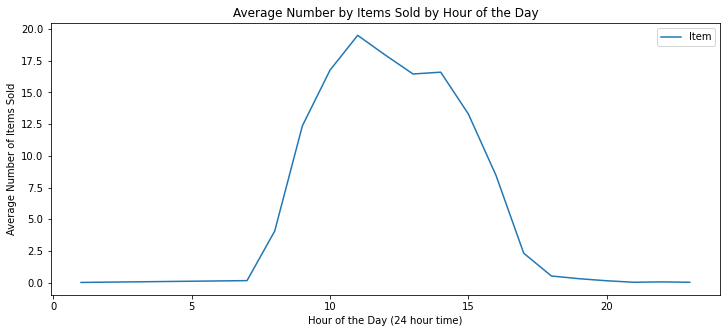

In [20]:
# plot the chart
bread_groupby_hour.plot(y="Item", figsize=(12,5), title="Average Number by Items Sold by Hour of the Day").set(xlabel="Hour of the Day (24 hour time)", ylabel="Average Number of Items Sold")

# sales groupby weekday

In [21]:

bread_groupby_weekday = bread.groupby("Weekday").agg({"Item": lambda item: item.count()})
bread_groupby_weekday

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124
6,4605
7,3095


## average items per weekday

In [22]:
# but we need to find out how many each weekday in that period of transaction
# in order to calculate the average items per weekday

import datetime 
daterange = pd.date_range(datetime.date(2016, 10, 30), datetime.date(2017, 4, 9))

monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(bread.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday

print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


In [23]:
# apply the conditions to calculate the average items for each weekday
conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/21, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday

,Item,Average
Weekday,,
1,2324,110.666667
2,2392,104.000000
3,2321,100.913043
4,2646,115.043478
5,3124,135.826087
6,4605,200.217391
7,3095,134.565217


## Average Number by Items Sold by Day of the Week

[Text(0.5, 0, 'Day of the Week (1=Monday, 7=Sunday)'),
 Text(0, 0.5, 'Average Number of Items Sold')]

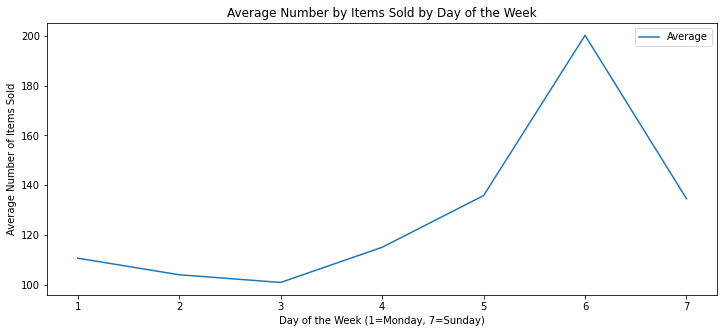

In [24]:
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")

In [25]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df.head()

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [26]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
basket[basket.Coffee == 4].iloc[:,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
6850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [28]:
# the encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [29]:
basket_sets = basket.applymap(encode_units)

basket_sets


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
basket_sets.columns

Index(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread', 'Bread Pudding',
       'Brioche and salami', 'Brownie', 'Cake', 'Caramel bites',
       'Cherry me Dried fruit', 'Chicken Stew', 'Chicken sand',
       'Chimichurri Oil', 'Chocolates', 'Christmas common', 'Coffee',
       'Coffee granules ', 'Coke', 'Cookies', 'Crepes', 'Crisps',
       'Drinking chocolate spoons ', 'Duck egg', 'Dulce de Leche', 'Eggs',
       'Ella's Kitchen Pouches', 'Empanadas', 'Extra Salami or Feta',
       'Fairy Doors', 'Farm House', 'Focaccia', 'Frittata', 'Fudge',
       'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack',
       'Half slice Monster ', 'Hearty & Seasonal', 'Honey', 'Hot chocolate',
       'Jam', 'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit',
       'Lemon and coconut', 'Medialuna', 'Mighty Protein', 'Mineral water',
       'M

In [31]:
basket_sets[basket_sets.Coffee == 1].iloc[3142:3145,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6884,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6885,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6887,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## Generate Frequent Itemsets

In [32]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Generate Association Rules ##
The final step is to generate the rules with their corresponding support, confidence and lift. We will set the minimum threshold for lift at 1 and then sort the result by descending confidence value.

In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("confidence", ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
